<a href="https://colab.research.google.com/github/SOBIKA-G/Data-science-assignment/blob/main/Sobika_G_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customers Dataset EDA**

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the dataset
customers = pd.read_csv('/content/drive/MyDrive/Customers.csv')

EDA

In [ ]:
#displaying the sample rows
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
# overview of dataset
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [ ]:
# checking missing values
customers.isna().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


In [ ]:
# displaying statistical summary
customers.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [ ]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# **Insight 1 - Count of Customer in each region**

In [ ]:
# count of customers in each region
region_counts = customers['Region'].value_counts()/len(customers['Region'])*100
for i in region_counts.index:
  print(f"{i}: {region_counts[i]:.2f}%")

South America: 29.50%
Europe: 25.00%
North America: 23.00%
Asia: 22.50%


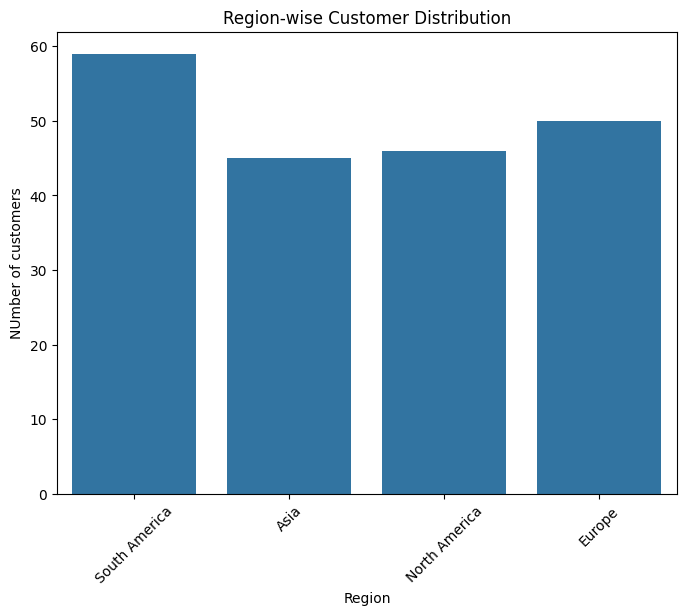

In [ ]:
# visual representation
plt.figure(figsize=(8,6))
sns.countplot(x='Region', data=customers)
plt.title('Region-wise Customer Distribution')
plt.xlabel('Region')
plt.ylabel('NUmber of customers')
plt.xticks(rotation = 45)
plt.show()

# **Insight2 - Trends in Customer Signups**

Average number of signups per month: 5.56
Peak signup month: 2024-09


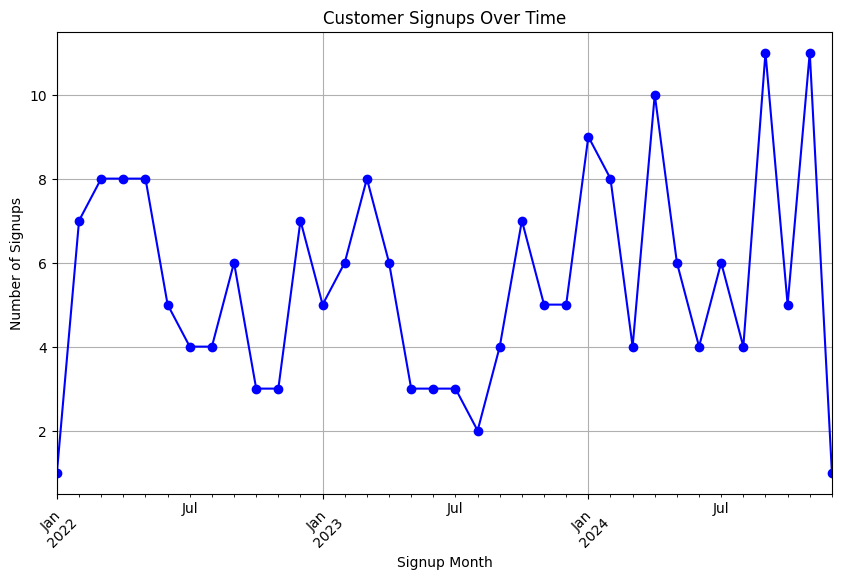

In [ ]:
customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers.groupby('SignupMonth').size()

# calculating average signups per month
avg_signups_per_month = customers['SignupMonth'].value_counts().mean()
print(f"Average number of signups per month: {avg_signups_per_month:.2f}")

# month with highest signups
peak_month = signup_trends.idxmax()
print(f"Peak signup month: {peak_month}")

# Visual representation
plt.figure(figsize=(10,6))
signup_trends.plot(kind = 'line',marker = 'o',color = 'b')
plt.title('Customer Signups Over Time')
plt.xlabel('Signup Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

# **Insight 3 - Signup Growth in Newer Regions**

Growth rates by region:
Region
Asia              0.000000
Europe            0.000000
North America    55.555556
South America   -36.363636
dtype: float64


<Figure size 1200x800 with 0 Axes>

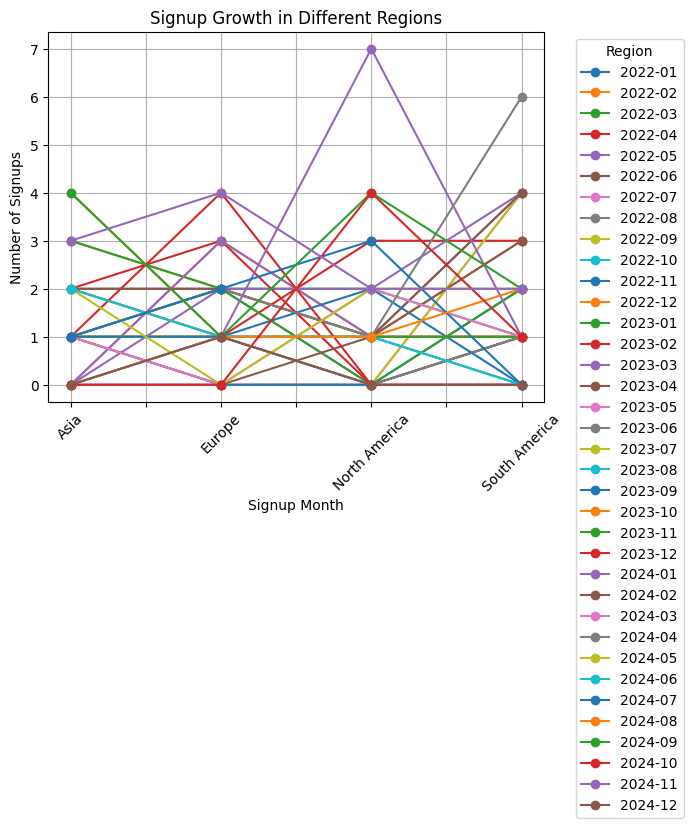

In [ ]:
# Calculate the number of signups by region and month
region_signup_trends = customers.groupby(['Region', 'SignupMonth']).size().unstack(fill_value=0)

# Plotting customer signups for each region over time
# Calculate signups in the first and last 6 months for each region
signup_trends = customers.groupby(['Region', 'SignupMonth']).size().unstack(fill_value=0)

# Calculate percentage growth between the first and last 6 months
growth_rates = ((signup_trends.iloc[:, -6:].sum(axis=1) - signup_trends.iloc[:, :6].sum(axis=1)) /
                signup_trends.iloc[:, :6].sum(axis=1)) * 100

print("Growth rates by region:")
print(growth_rates)
plt.figure(figsize=(12,8))
region_signup_trends.plot(kind='line', marker='o')
plt.title('Signup Growth in Different Regions')
plt.xlabel('Signup Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# **Insight 4 - Customer Longevity**

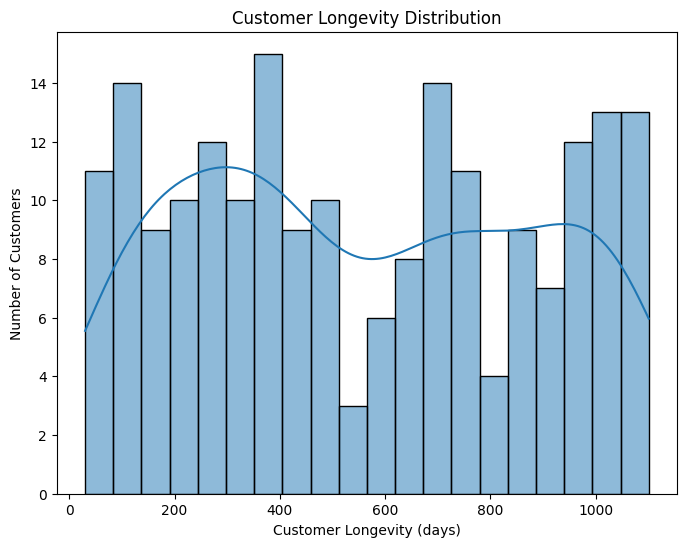

In [ ]:
current_date =  pd.to_datetime('today')
customers['CustomerLongevity'] = (current_date - customers['SignupDate']).dt.days

#visualization
plt.figure(figsize = (8,6))
sns.histplot(customers['CustomerLongevity'], bins = 20, kde = True)
plt.title('Customer Longevity Distribution')
plt.xlabel('Customer Longevity (days)')
plt.ylabel('Number of Customers')
plt.show()

# **Insight 5 - Geographic Market Potential**

Text(0, 0.5, 'Number of Customers')

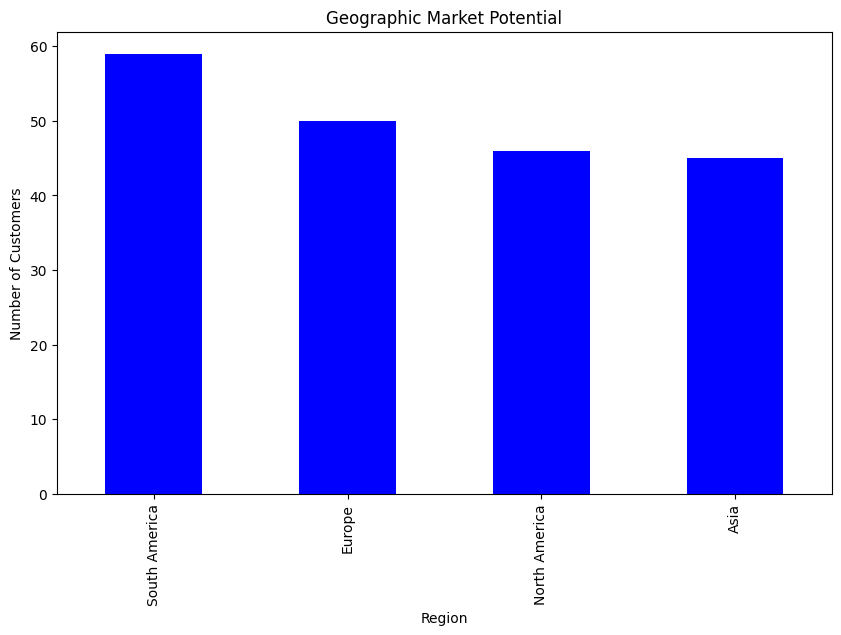

In [ ]:
regions_counts = customers['Region'].value_counts()
plt.figure(figsize = (10,6))
regions_counts.plot(kind = 'bar',color = 'b')
plt.title('Geographic Market Potential')
plt.xlabel('Region')
plt.ylabel('Number of Customers')

# **Products Dataset EDA**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
products = pd.read_csv('/content/drive/MyDrive/Products (1).csv')

In [ ]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
#checking null values
products.isna().sum()

,0
ProductID,0
ProductName,0
Category,0
Price,0


# **Insight1 : Price range by Category**

               min     max
Category                  
Books        33.59  497.76
Clothing     18.82  481.78
Electronics  16.08  459.86
Home Decor   41.18  454.53


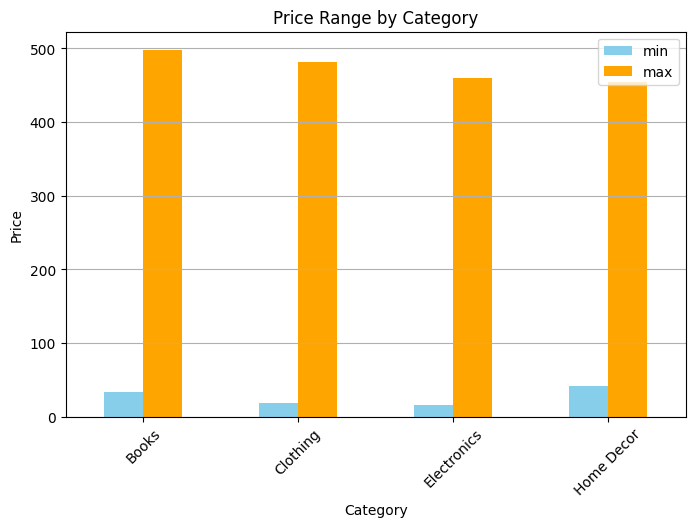

In [ ]:
# Price range by category
import matplotlib.pyplot as plt
price_range = products.groupby("Category")["Price"].agg(["min", "max"])
print(price_range)

# Visualization
price_range.plot(kind="bar", figsize=(8, 5), color=["skyblue", "orange"])
plt.title("Price Range by Category")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# **Insight2 - Category-Wise Product Distribution**

Category-Wise Product Distribution:
 Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


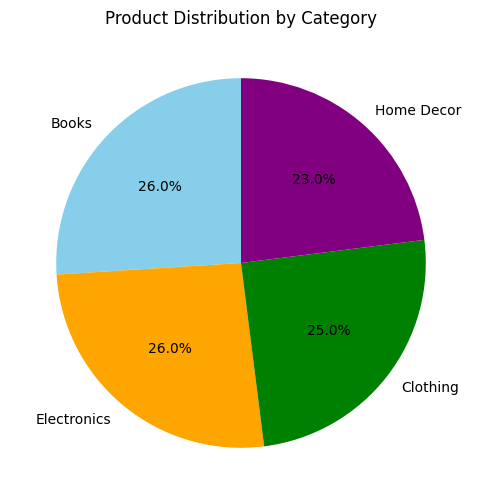

In [ ]:
# Product count by category
category_distribution = products["Category"].value_counts()
print("Category-Wise Product Distribution:\n", category_distribution)

# Visualization
category_distribution.plot(kind="pie", autopct='%1.1f%%', startangle=90, figsize=(6, 6), colors=["skyblue", "orange", "green", "purple"])
plt.title("Product Distribution by Category")
plt.ylabel("")
plt.show()


#**Insight3 -  Average Price by Category**

Average Price by Category:
 Category
Books          292.21
Clothing       263.72
Electronics    275.35
Home Decor     235.02
Name: Price, dtype: float64


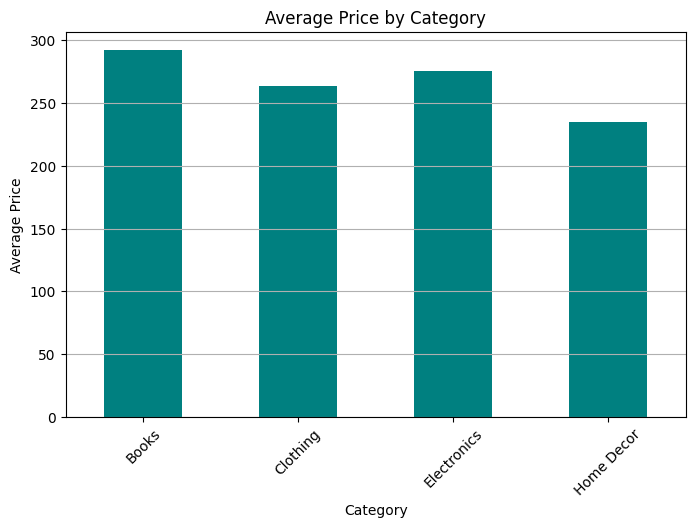

In [ ]:
# Average price by category
average_price = products.groupby("Category")["Price"].mean().round(2)
print("Average Price by Category:\n", average_price)
# Visualization
average_price.plot(kind="bar", figsize=(8, 5), color="teal")
plt.title("Average Price by Category")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


#**Insight4 -  Most Expensive and Least Expensive Products**


Most Expensive Product:
 ProductID                  P075
ProductName    TechPro Textbook
Category                  Books
Price                    497.76
Name: 74, dtype: object

Least Expensive Product:
 ProductID                      P056
ProductName    SoundWave Smartwatch
Category                Electronics
Price                         16.08
Name: 55, dtype: object


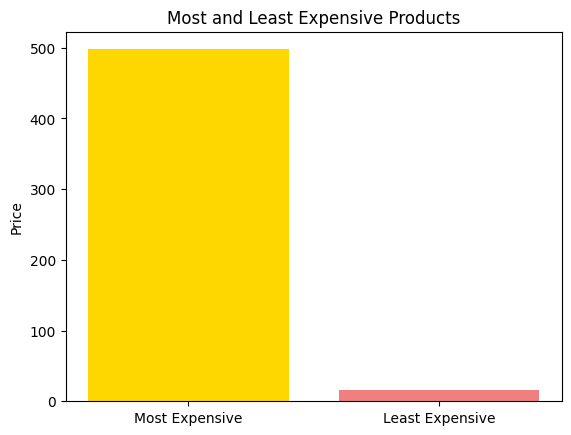

In [ ]:
# Most and least expensive products
most_expensive = products.loc[products["Price"].idxmax()]
least_expensive = products.loc[products["Price"].idxmin()]
print("Most Expensive Product:\n", most_expensive)
print("\nLeast Expensive Product:\n", least_expensive)
# Visualization
plt.bar(["Most Expensive", "Least Expensive"], [most_expensive["Price"], least_expensive["Price"]], color=["gold", "lightcoral"])
plt.title("Most and Least Expensive Products")
plt.ylabel("Price")
plt.show()


# **Insight 5 -  Contribution to Total Revenue by Category**

Total Revenue by Category:
 Category
Books          7597.52
Clothing       6593.00
Electronics    7159.19
Home Decor     5405.46
Name: Price, dtype: float64

Revenue Contribution by Category (in %):
 Category
Books          28.40
Clothing       24.64
Electronics    26.76
Home Decor     20.20
Name: Price, dtype: float64


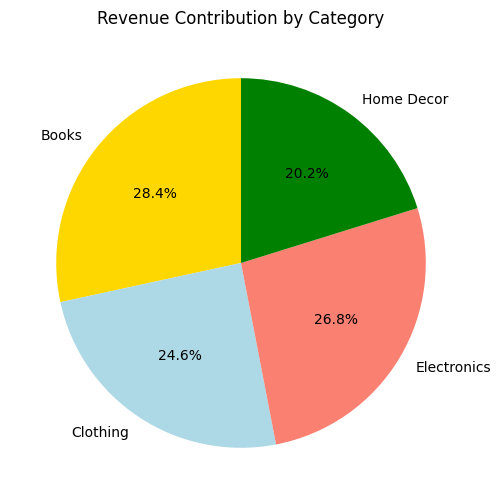

In [ ]:
# Revenue contribution by category
total_revenue = products.groupby("Category")["Price"].sum().round(2)
revenue_percentage = ((total_revenue / total_revenue.sum()) * 100).round(2)
print("Total Revenue by Category:\n", total_revenue)
print("\nRevenue Contribution by Category (in %):\n", revenue_percentage)

# Visualization
revenue_percentage.plot(kind="pie", autopct='%1.1f%%', startangle=90, figsize=(6, 6), colors=["gold", "lightblue", "salmon", "green"])
plt.title("Revenue Contribution by Category")
plt.ylabel("")
plt.show()


# **Transaction Dataset EDA**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
transactions = pd.read_csv('/content/drive/MyDrive/Transactions (1).csv')

In [ ]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
# Missing values
transactions.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


In [ ]:
# Statistical summary of data
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


# **Insight 1: Top 10 Popular Products by Purchase Count**

Top 10 Popular Products:
 ProductID
P059    19
P029    17
P062    16
P079    16
P054    16
P061    16
P048    15
P022    15
P096    15
P049    15
Name: count, dtype: int64


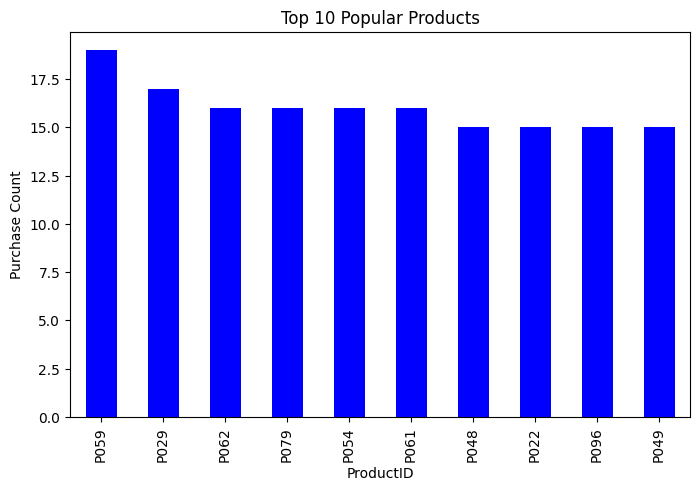

In [ ]:
# Calculate product popularity (frequency of each product)
product_popularity = transactions['ProductID'].value_counts()

# Get the top 10 products by frequency
top_products = product_popularity.head(10)
print("Top 10 Popular Products:\n", top_products)

# Visualization
top_products.plot(
    kind='bar',
    title='Top 10 Popular Products',
    ylabel='Purchase Count',
    xlabel='ProductID',
    color='blue',
    figsize=(8, 5)
)
plt.show()


# **Insight 2: Top 10 Customers by Purchase Frequency**

Top 10 Customers by Purchase Frequency:
 CustomerID
C0109    11
C0156    11
C0141    10
C0175    10
C0065    10
C0008    10
C0147     9
C0093     9
C0075     9
C0084     9
Name: count, dtype: int64


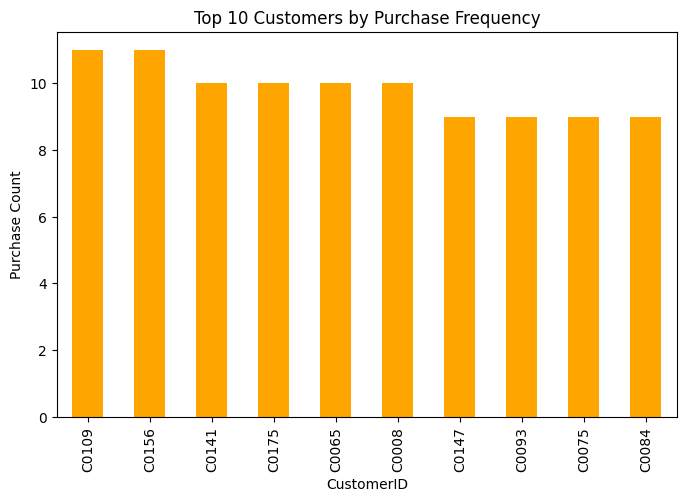

In [ ]:
# Focus on the top 10 customers
customer_frequency = transactions['CustomerID'].value_counts()
top_customers = customer_frequency.head(10)
print("Top 10 Customers by Purchase Frequency:\n", top_customers)

# Visualization
top_customers.plot(
    kind='bar',
    title='Top 10 Customers by Purchase Frequency',
    ylabel='Purchase Count',
    xlabel='CustomerID',
    color='orange',
    figsize=(8, 5)
)
plt.show()


# **Insight 3: Average Quantity Purchased Per Transaction**

Average Quantity Purchased Per Transaction: 2.54


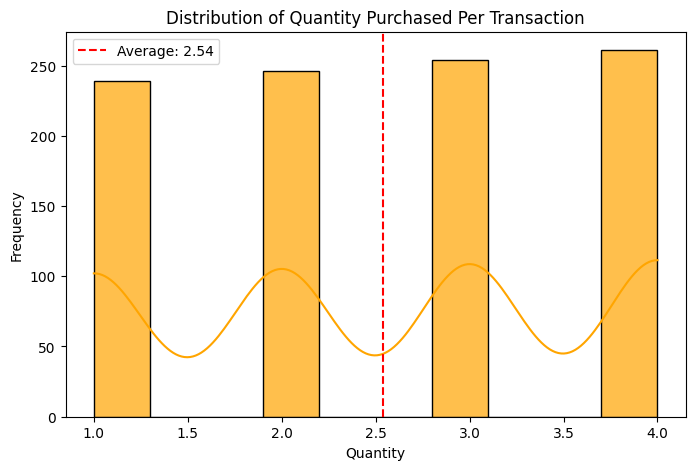

In [ ]:
import seaborn as sns
# Calculate the average quantity purchased per transaction
avg_quantity = transactions['Quantity'].mean()
print(f"Average Quantity Purchased Per Transaction: {avg_quantity:.2f}")

# Distribution of quantities purchased
plt.figure(figsize=(8, 5))
sns.histplot(transactions['Quantity'], bins=10, kde=True, color='orange', edgecolor='black', alpha=0.7)
plt.axvline(avg_quantity, color='red', linestyle='--', label=f"Average: {avg_quantity:.2f}")
plt.title("Distribution of Quantity Purchased Per Transaction")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# **Insight 4: Monthly Revenue Trend**

Monthly Revenue:
 Month
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


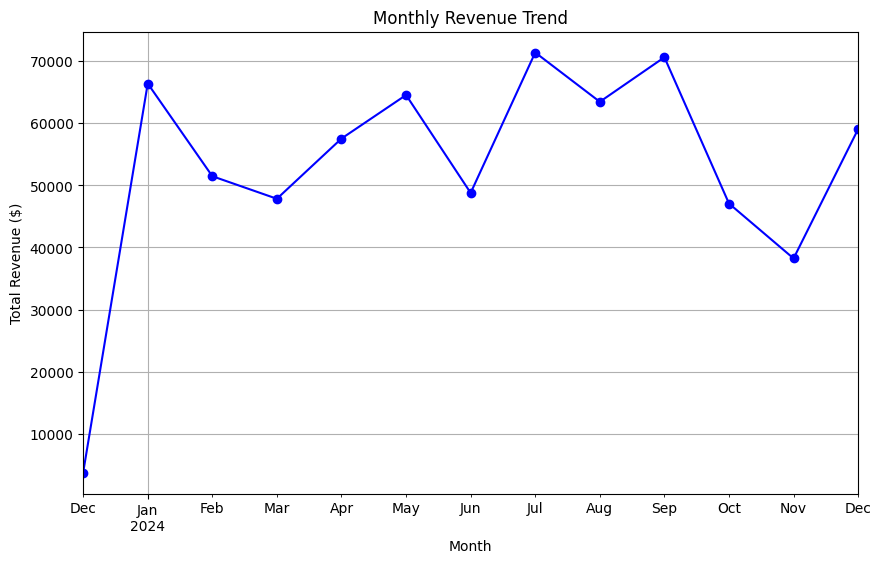

In [ ]:
# Extract month and year from the transaction date
transactions['Month'] = pd.to_datetime(transactions['TransactionDate']).dt.to_period('M')

# Calculate total revenue per month
monthly_revenue = transactions.groupby('Month')['TotalValue'].sum()

print("Monthly Revenue:\n", monthly_revenue)

# Visualization
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', marker='o', color='blue')
plt.title("Monthly Revenue Trend")
plt.ylabel("Total Revenue ($)")
plt.xlabel("Month")
plt.grid(True)
plt.show()


# **Insight 5: Revenue Contribution by Product**

Top 10 Products by Revenue Contribution:
 ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
P059    13947.20
P039    13778.88
P083    13671.60
P019    13487.95
P041    13232.12
Name: TotalValue, dtype: float64


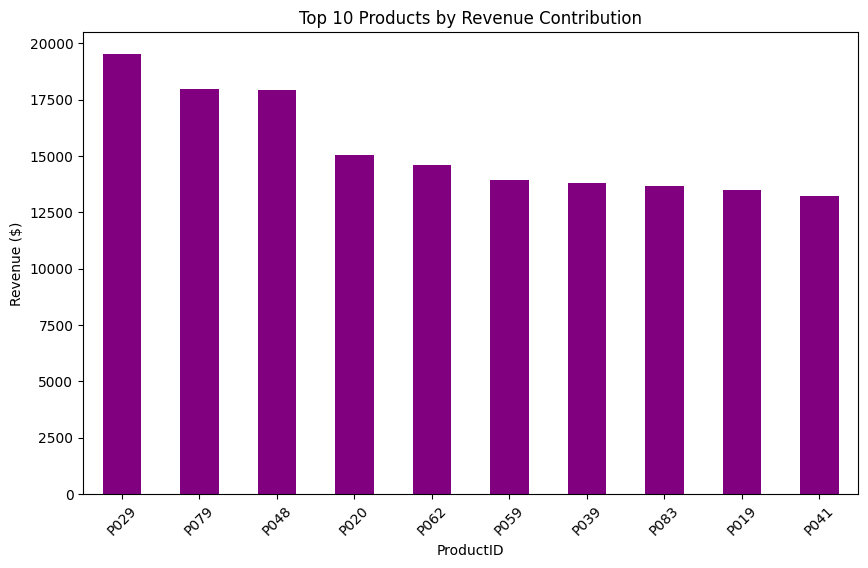

In [ ]:
# Calculate total revenue per product
product_revenue = transactions.groupby('ProductID')['TotalValue'].sum()

# Sort products by revenue and get the top 10
top_product_revenue = product_revenue.sort_values(ascending=False).head(10)
print("Top 10 Products by Revenue Contribution:\n", top_product_revenue)

# Visualization
plt.figure(figsize=(10, 6))
top_product_revenue.plot(kind='bar', color='purple')
plt.title("Top 10 Products by Revenue Contribution")
plt.ylabel("Revenue ($)")
plt.xlabel("ProductID")
plt.xticks(rotation=45)
plt.show()
